In [253]:
def print_full(x):
    '''
    print all rows in a Df
    '''
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')
    
# hide code
from IPython.display import HTML

# standard imports
from scipy.fftpack import fft, ifft
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np
import warnings;  warnings.filterwarnings('ignore');

from model import fourierModel, lrcMultiFreqGain

# refresh button
from IPython.display import Javascript
Javascript('IPython.notebook.execute_cells_below()')
from IPython.display import Javascript, display
from ipywidgets import widgets

# widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
from matplotlib.offsetbox import AnchoredText

# curve fitting stuff
from scipy.stats import norm
from scipy.optimize import curve_fit

HTML(''' <style>
.output{
    display: table-cell;
    align-items: center;
    text-align: center;
    vertical-align: middle;
    }
</style>

<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')




In [87]:
#matplotlib settings
%matplotlib inline

<a id='top'></a>
## Table of contents
- [Calibration](#calibration)
- [Data](#data)
 - [Visualization of the Distribution (Scatterplot)](#visdis)
 - [Thermal and Oscillatory Motion (Histogram)](#thermosc)
 - [Kernel Density Estimate (Normalized, Smoothed Histogram)](#kerden)
 - [Joint Probability Distribution (Interactive)](#jointprob)
 - [Fourier Domain (Frequency Domain Line Plot)](#fourdom)
 - [Particle Mass (Theory and Implementation)](#mass)
- [Questions](#quests)
 - [High Vacuum Brownian Motion](#q1)
 - [Diffusion Coefficients](#q2)
 - [Purpose of Brownian Measurements](#q3)
 - [Harmonic Oscillation](#q4)
 - [Quality Factors](#q5)

<a id='calibration'></a>
### Calibration

<p>
    Before taking any data, we calibrated the camera. The process on this is pretty much the same as last lab. The camera has a single very narrow focal distance. So, we took a picture of a ruler. Then I fed the image into gimp, rotated it, and used the "measure" tool.
    
</p>
<br>
![Image of horizontal calibration](../../figures/hcal.png)

<center>
    *Ruler that we used to calibrate. The smallest marks are spaced by 10 $\mu$m (or .5 pixels). So, a pixel is 20$\mu$m*
</center>

<br>

<p>
    For both orientations (vertical and horizontal), there are 5 pixels between the large markings. This means that a pixel corresponds to 
    $1/5 \times 100 = 20 \mu m$
and makes it easy to convert our data into meaningful units.
</p>

<br>

<p>
    From the datasheet, we know that without the microscope objective the *Basler acA1920-40um* has a pixel size of 5.86x5.86 $\mu m$. So, combining that with the .3x objective we would have expected 1 pixel to be $\frac{5.86}{.3} = 19.53 \mu m$. Our calibration was a success!
</p>
[Back to Top](#top)

<a id='data'></a>
### Data

The data for this lab was a bit better than the data from last time. We didn't have to wait 40 minutes for the vacuum to pump down every time we lost a particle. Also, were not required to take as many measurements.

<br>

Fortunately, the framework that I built last week means that all I really had to do in order to analyze this data was change the files that I read in at the top.

<br>

Again, after running all the cells you can select any date that we were in lab from the drop-down. Then, select one of the measurements that we took and hit "refresh" in order to load all of the relevant plots and captions.

[Back to Top](#top)

In [318]:
from collections import OrderedDict
data={
    '4/12/18':
        {
            '201 Hz':'https://raw.githubusercontent.com/jpribyl/cautious-palm-tree/master/lab5/data/41218/200hz/',
            '60 Hz':'https://raw.githubusercontent.com/jpribyl/cautious-palm-tree/master/lab5/data/41218/60hz/',
            'transient first attempt (sub-par results)':'https://raw.githubusercontent.com/jpribyl/cautious-palm-tree/master/lab5/data/41218/transient/attempt_1/',
            'transient second attempt (sub-par results)':'https://raw.githubusercontent.com/jpribyl/cautious-palm-tree/master/lab5/data/41218/transient/attempt_2/',
        },
    
    '4/19/18': 
        {
            'Transient Response: 5000 frames, two particles (decent results)':'https://raw.githubusercontent.com/jpribyl/cautious-palm-tree/master/lab5/data/41918/transient/5000_frames_two_particles/',
            'Transient Response: 5000 frames, one particle (good results)':'https://raw.githubusercontent.com/jpribyl/cautious-palm-tree/master/lab5/data/41918/transient/5000_frames_one_particle/',
            'Transient Response: 20000 frames, two particles (mediocre results)':'https://raw.githubusercontent.com/jpribyl/cautious-palm-tree/master/lab5/data/41918/transient/20000_frames_two_particles/',
       },
}

def select_data(pressure):
    
    global trajectory
    global distcap
    global framerate
    
    baseurl = pressure
    print(baseurl)
    
    trajectory = pd.read_csv(baseurl + 'trajectory.csv')
    distcap = requests.get(baseurl + 'distcap.txt').text
    framerate = float(requests.get(baseurl + 'framerate').text)
    
    return trajectory
    
def select_date(date):
    #pressureWidg.options = data[date]
    pressureWidg.options = OrderedDict(sorted(data[date].items()))


dateWidg = widgets.Dropdown(options=sorted(data.keys()))

# save the current value of date to use below 
init = dateWidg.value
pressureWidg = widgets.Select(
    #options=sorted(data[init]),
    #options=sorted(data[dateWidg.value].keys()),
    layout=Layout(width='70%')
)

i = widgets.interactive(select_date, date=dateWidg)
j = widgets.interactive(select_data, pressure=pressureWidg)
display(i, j)

interactive(children=(Dropdown(description='date', options=('4/12/18', '4/19/18'), value='4/12/18'), Output())…

interactive(children=(Select(description='pressure', layout=Layout(width='70%'), options=OrderedDict([('201 Hz…

In [296]:

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Refresh")
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Refresh', style=ButtonStyle())

In [297]:
# set the relevant things and convert to micro m
x = trajectory['x'] * 20
y = trajectory['y'] * 20

# catch the off by 1 error
N = len(x)
if N % 2 !=0:
    x[N]=0
    y[N]=0
    N+=1
    
# read in framerate from github
t = pd.Series(range(N)) / framerate

mux, sigmax = norm.fit(x)
muy, sigmay = norm.fit(y)

<a id='visdis'></a>
#### Visualizing the Distribution

This is a scatterplot of the .csv generated by track_particle.py. It tracks the particles location over the course of time that data was collected. This plot is visually intriguing but not especially informative. 

<br>

Some of these plots look a bit like Pokemon. It seems very probable that this is merely a coincidence. However, it's always possible that the Japanese developers (or their monsters) studied physics.

[Back to Top](#top)

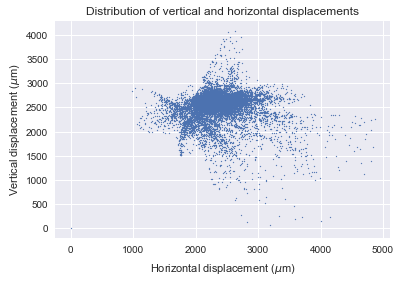

In [298]:
# set sane matplot settings
sns.set()

# visualize the distribution
plt.scatter(x, y, s=1);
plt.xlabel('Horizontal displacement ($\mu$m) \n');
plt.ylabel('Vertical displacement ($\mu$m)');
plt.title('Distribution of vertical and horizontal displacements');

<a id='thermosc'></a>
#### Thermal & Oscillatory Motion

You might notice that this data does not look especially gaussian. In fact, the fit model actually fails on this data. That's because the micromotion (IE the 60 Hz peak from the wall outlet) is dominant. 

<br>

In order to rectify this, we need to transform the data, zero out all the peaks that correspond to micromotion. If you scroll down, you'll find that after doing this, the fit converges quite nicely.

[Back to Top](#top)

In [299]:
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp( - ((x - mean) / standard_deviation) ** 2)

def fit_gaussian(x, mu_guess, num_points=10000):
    bin_heights, bin_borders = np.histogram(x, bins='auto')
    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
    popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[mu_guess, 0., 1.])

    x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], num_points)
    return x_interval_for_fit, gaussian(x_interval_for_fit, *popt)

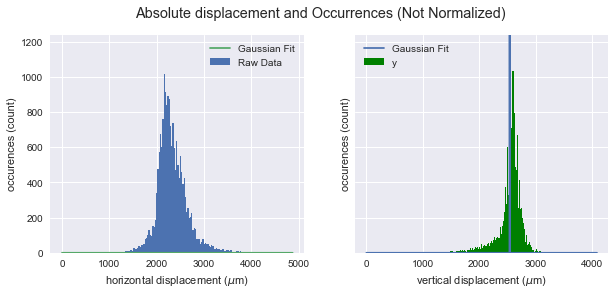

In [300]:
x_interval, x_gauss = fit_gaussian(x, mux)
y_interval, y_gauss = fit_gaussian(y, muy)

# build the fig and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# auto-choose bins
ax1.hist(x, 'auto', label='Raw Data')
ax1.plot(x_interval, x_gauss, label='Gaussian Fit')
ax1.set_xlabel("horizontal displacement ($\mu$m)")
ax1.set_ylabel("occurences (count)")
ax1.legend()

ax2.hist(y, 'auto', color='g')
ax2.plot(y_interval, y_gauss, label='Gaussian Fit')
ax2.set_xlabel("vertical displacement ($\mu$m)")
ax2.set_ylabel("occurences (count)")
ax2.legend()

fig.set_figwidth(10)

ycounts, bins = np.histogram(y, bins='auto')
ax1.set_ylim(0,max(ycounts)+200)
fig.suptitle("Absolute displacement and Occurrences (Not Normalized)");

<a id='kerden'></a>
#### Kernel Density Estimate

As last time, here is the KDE from the Seaborn:

<br>
[Back to Top](#top)

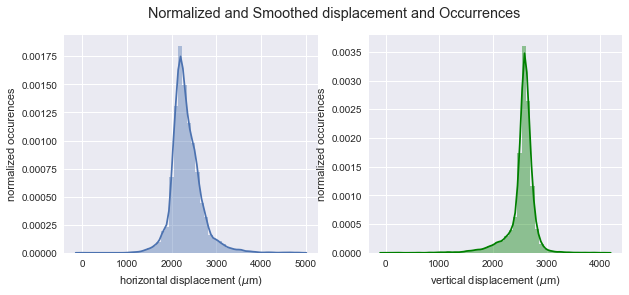

In [301]:
fig, (ax1, ax2) = plt.subplots(1, 2)
# normalized hist with a gaussian kenel density estimate
sns.distplot(x, ax=ax1)
sns.distplot(y, ax=ax2, color='g')

ax1.set_xlabel("horizontal displacement ($\mu$m)")
ax1.set_ylabel("normalized occurences")
ax2.set_xlabel("vertical displacement ($\mu$m)")
ax2.set_ylabel("normalized occurences")

fig.set_figwidth(10)
fig.suptitle("Normalized and Smoothed displacement and Occurrences");

#### Density Contour

And the desity contour plot as well
<br>

[Back to Top](#top)

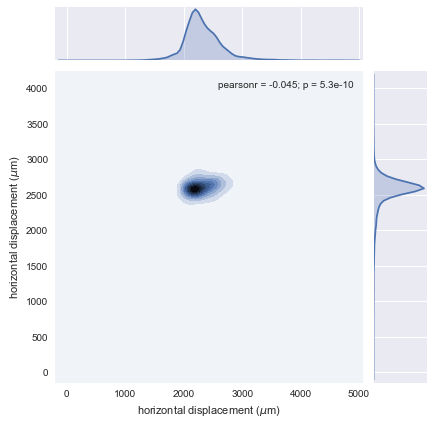

In [302]:
# a density contour plot of displacements
# IE joint probability and marginal combined
sns.jointplot(x, y, kind='kde').set_axis_labels(
    "horizontal displacement ($\mu$m)",
    "horizontal displacement ($\mu$m)");

<a id='jointprob'></a>
#### Joint Probability Distribution

This plot shows how a distribution changes from one point to the next. Mathematically, I am plotting

$$P(x_i(t), x_i(t + \Delta t))$$

and

$$P(y_i(t), y_i(t + \Delta t))$$

I do this by taking x[ i ] and plotting it against x[ i + n ] where "i" represents an element from the array of points gathered and "n" is some integer. Although these plots are visually interesting (even beautiful) - they are not physically meaningful. I have included them as further evidence for the need to zero out the micromotion.

[Back to Top](#top)

In [303]:
def plot_joint_dist(n):
    x_i = x[:-n]
    x_i_n = x[n:]
    y_i = y[:-n]
    y_i_n = y[n:]
    
    #build the axes
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(10)
    fig.set_figheight(4.5)
    
    sns.regplot(x_i_n, x_i, scatter_kws={"s":1}, ax=ax1)
    sns.regplot(y_i_n, y_i, scatter_kws={"s":1}, ax=ax2)
    
    ax1.set_title('joint probability for x')
    ax1.set_xlabel('x[i] displacement ($\mu$m)')
    ax1.set_ylabel('x[i + n] displacement ($\mu$m)')

    ax2.set_title('joint probability for y')
    ax2.set_xlabel('y[i] displacement ($\mu$m)')
    ax2.set_ylabel('y[i + n] displacement ($\mu$m)')
    
    
    
j = widgets.interactive(
    plot_joint_dist, 
    n=widgets.IntSlider(min=1, max=25, step=1, value=1)
)

display(j)
    

interactive(children=(IntSlider(value=1, description='n', max=25, min=1), Output()), _dom_classes=('widget-int…

<a id='fourdom'></a>
#### Fourier Model

The final thing which we are asked to do before getting rid of the 60 Hz peak is plot the distribution in the fourier domain. I made use of the fourierModel class that I wrote a while back. It uses SciPy's fft function.

<br>

For this lab, we have a variety of framerates and data points. So, I have added a file into each directory of the github repo that contains the sampling frame rate. By reading this file in as a float, I am able to update the camera's framerate every time you refresh the page.

<br>

<br>

<a id='mass'></a>
#### Particle Mass

Last time we were able to use this distribution to reconstruct the mass of the particle:

$$P(x) \propto e^{\frac{-m \omega_i^2 x_i^2}{2k_bT}}$$

However, without using the vacuum we are not able to get the actual $\omega$ for our particles and the naive mass calculate here is certainly incorrect. We will see later that it differs from the true mass by roughly 4 orders of magnitude.

[Back to Top](#top)

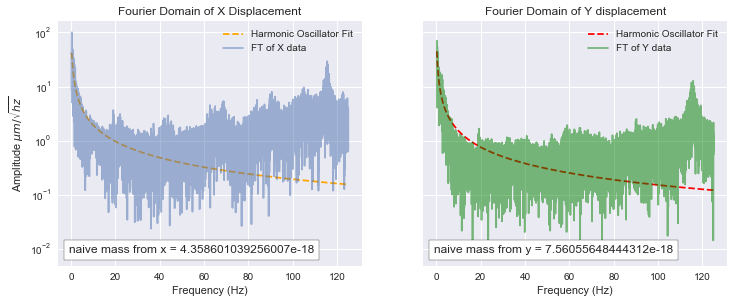

In [304]:
# FT the data
x_model = fourierModel(x, numPoints=x.shape[0])
x_x_ft = x_model.transformX()[20:]
x_y_ft = x_model.transformY()[20:]

y_model = fourierModel(y, numPoints=y.shape[0])
y_x_ft = y_model.transformX()[20:]
y_y_ft = y_model.transformY()[20:]

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

#Fit the FT as a HO
try:
    x_model_fit = lrcMultiFreqGain(x_x_ft, x_y_ft, yerr=None)
    xxfit, xyfit = x_model_fit.model(p0=[5, 10**-13, 50, 1])
    ax1.plot(xxfit, xyfit, '--', color='orange', label='Harmonic Oscillator Fit')
except RuntimeError:
    print('x fit did not converge')

try:
    y_model_fit = lrcMultiFreqGain(y_x_ft, y_y_ft, yerr=None)
    yxfit, yyfit = y_model_fit.model(p0=[5, 10**-13, 50, 1])
    ax2.plot(yxfit, yyfit, '--', color='r', label='Harmonic Oscillator Fit')
except RuntimeError:
    print('y fit did not converge')


ax1.set_xlabel('Frequency (Hz)');
ax1.set_ylabel('Amplitude $\mu m / \sqrt{hz}$')
ax1.set_title('Fourier Domain of X Displacement')
ax1.set_yscale('log')
ax1.plot(x_x_ft, x_y_ft, alpha=.5, label='FT of X data')
ax1.legend(loc=1)

ax2.set_xlabel('Frequency (Hz)');
ax2.set_title('Fourier Domain of Y displacement')
ax2.set_yscale('log')
ax2.plot(y_x_ft, y_y_ft, color='g', alpha=.5, label="FT of Y data")
ax2.legend(loc=1)

fig.set_figwidth(12)
fig.set_figheight(4.5)


# df with fourier data clipping off the ends
ftdf = pd.DataFrame({'xfreq': x_x_ft, 'xamp':x_y_ft, 'yfreq':y_x_ft, 'yamp':y_y_ft})
ftdf = ftdf.loc[(ftdf['xfreq'] > 40) & (ftdf['xfreq'] < 100)]

# get freq from peak to use with mass (use x)
wx = ftdf.loc[ftdf['xamp'].idxmax(), 'xfreq']
wy = ftdf.loc[ftdf['yamp'].idxmax(), 'yfreq']
kb = 1.38064852 * 10**(-23) 
T = 295 #room temp
massx = (kb * T) / ((sigmax / 10**6) * wx)**2
massy = (kb * T) / ((sigmay / 10**6) * wy)**2

# include particle mass
massx_text = AnchoredText("naive mass from x = " + str(massx), loc=3);
ax1.add_artist(massx_text);

massy_text = AnchoredText("naive mass from y = " + str(massy), loc=3);
ax2.add_artist(massy_text);


In [305]:
#mu / sqrt(hz) is my unit for y (ie amplitude spectrum)
#for driven, there is only a single frequency (so you can get it from the graph)
#thermal is peaked around zero

#ft is amplitude spectrum
#absolute value squared is power spectrum
#one peak is transverse motion, another is camera vibration

#averaging several measurements ought to be done in the power spectrum
#ie adding up should be done on squares (because noise is random)
#similarly, subracting off noise should be done in the power spectrum
#power spectrum good for noise driven

#coherent driving (ie known phase) can be done in amplitude spectrum

<a id='micro'></a>
### Removing Micromotion

If we Fourier Transform the data, zero out the peaks above... say 15 Hz, and transform the data back into the time domain, then we are able to remove the 60 Hz peak and all of its relevant harmonics. This lets us perform analysis that is far more meaningful. 

<br>

But, before we can do that we need to be sure that transforming the data and then inverse transofming it does not break anything. So, here is a plot that contains the original data on the left and the doubly transformed data on the right. They look identical to me, so it's probably safe to proceed.

In [306]:
x_y_ft_complex = x_model.complexTransformY()
x_x_ft_complex = x_model.complexTransformX()

y_y_ft_complex = y_model.complexTransformY()
y_x_ft_complex = y_model.complexTransformX()

In [307]:
#exploiting the fact that false*float = 0 in python 
x_x_ft_complex_windowed = (
    x_x_ft_complex * 
    ((x_x_ft_complex > -15) & (x_x_ft_complex < 15))
)

x_y_ft_complex_windowed = (
    x_y_ft_complex * 
    ((x_x_ft_complex > -15) & (x_x_ft_complex < 15))
)

#exploiting the fact that false*float = 0 in python 
y_x_ft_complex_windowed = (
    y_x_ft_complex * 
    ((y_x_ft_complex > -15) & (y_x_ft_complex < 15))
)

y_y_ft_complex_windowed = (
    y_y_ft_complex * 
    ((y_x_ft_complex > -15) & (y_x_ft_complex < 15))
)

#all arrays are the same length
x_x_windowed = len(x) / 2 * ifft(x_x_ft_complex_windowed)
x_y_windowed = len(x) / 2 * ifft(x_y_ft_complex_windowed)

y_x_windowed = len(y) / 2 * ifft(y_x_ft_complex_windowed)
y_y_windowed = len(y) / 2 * ifft(y_y_ft_complex_windowed)

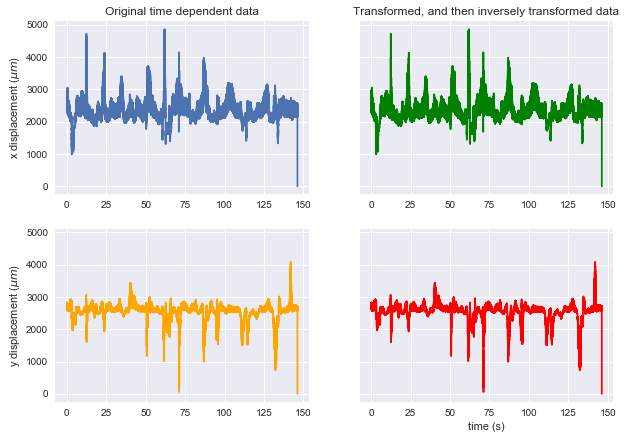

In [308]:
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2,2, sharey=True)
ax1.plot(t, x)
ax1.set_title('Original time dependent data')
ax1.set_ylabel('x displacement ($\mu m$)')

ax2.plot(t, len(x) / 2 * ifft(x_y_ft_complex), c='g')
ax2.set_title('Transformed, and then inversely transformed data')

ax3.plot(t, y, c='orange')
ax3.set_ylabel('y displacement ($\mu m$)')
ax4.set_xlabel('time (s)')

ax4.plot(t, len(y) / 2 * ifft(y_y_ft_complex), c='r')
ax4.set_xlabel('time (s)')

fig.set_figwidth(10)
fig.set_figheight(7)

<a id='sec-dis'></a>
### Secular Motion displacement and Time Dependent Amplitude
I was able to zero out the "bad" data by exploiting the fact that, in python $1 \times false = 0$. After doing this and zeroing out everything above 15 Hz (and below -15 Hz) we get a much better displacement graph. You can compare the left-hand graph to the Pokemon shaped graphs up above. With the exception of the transient response data, these results look to be normally distributed.

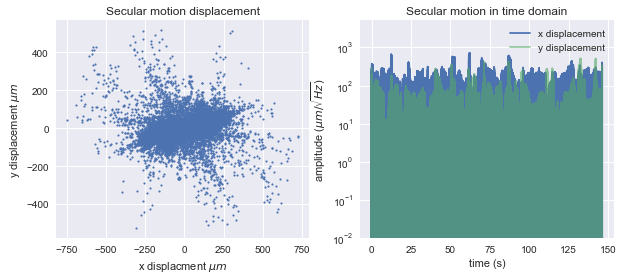

In [309]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(x_y_windowed, y_y_windowed, s=3)
ax1.set_title('Secular motion displacement')
ax1.set_xlabel('x displacment $\mu m$')
ax1.set_ylabel('y displacement $\mu m$')

ax2.plot(t, x_y_windowed, label='x displacement')
ax2.plot(t, y_y_windowed,alpha=.6, label='y displacement')
ax2.set_yscale('log')
ax2.set_ylim(10**-2, 10*max(y_y_windowed));
ax2.legend()

ax2.set_title('Secular motion in time domain')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('amplitude ($\mu m / \sqrt{Hz}$)')

fig.set_figwidth(10)

And indeed, the remaining displacements are definitely centered around zero and quite gaussian:

In [310]:
x = np.real(x_y_windowed)
y = np.real(y_y_windowed)

mux, sigmax = norm.fit(x)
muy, sigmay = norm.fit(y)

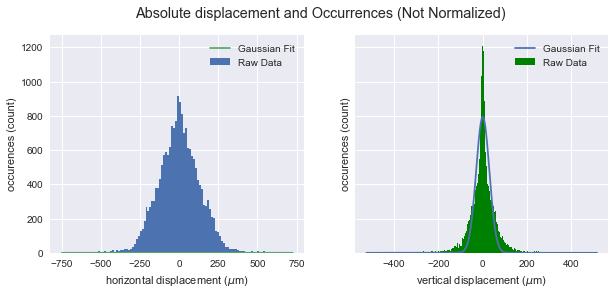

In [311]:
x_interval, x_gauss = fit_gaussian(x, mux)
y_interval, y_gauss = fit_gaussian(y, muy)

# build the fig and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# auto-choose bins
ax1.hist(x, 'auto', label='Raw Data')
ax1.plot(x_interval, x_gauss, label='Gaussian Fit')
ax1.set_xlabel("horizontal displacement ($\mu$m)")
ax1.set_ylabel("occurences (count)")
ax1.legend()

ax2.hist(y, 'auto', color='g', label='Raw Data')
ax2.plot(y_interval, y_gauss, label='Gaussian Fit')
ax2.set_xlabel("vertical displacement ($\mu$m)")
ax2.set_ylabel("occurences (count)")
ax2.legend()

fig.set_figwidth(10)
fig.suptitle("Absolute displacement and Occurrences (Not Normalized)");

The velocity is also relatively gaussian (although the summed squares of the velocity $\sqrt{v_x^2 + v_y^2}$ will not be)

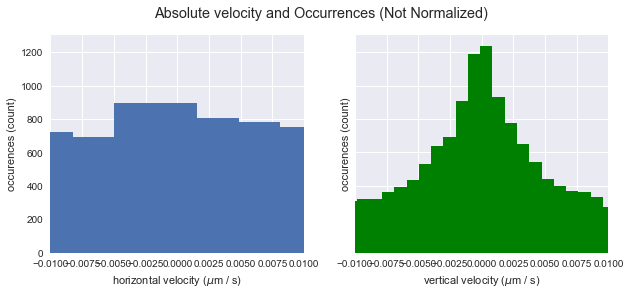

In [312]:
#in meters / s
velocity_x = (x[1:] - x[:-1]) * framerate * 10**-6
velocity_y = (y[1:] - y[:-1]) * framerate * 10**-6

mu_vx, sigma_vx = norm.fit(velocity_x)
mu_vy, sigma_vy = norm.fit(velocity_y)

x_interval, x_gauss = fit_gaussian(velocity_x, mu_vx)
y_interval, y_gauss = fit_gaussian(velocity_y, mu_vy)

# build the fig and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# auto-choose bins
ax1.hist(velocity_x, 'auto', label='Raw Data')
ax1.set_xlabel("horizontal velocity ($\mu$m / s)")
ax1.set_ylabel("occurences (count)")

ax2.hist(velocity_y, 'auto', color='g', label='Raw Data')
ax2.set_xlabel("vertical velocity ($\mu$m / s)")
ax2.set_ylabel("occurences (count)")
ax1.set_xlim(-.01, .01)
ax2.set_xlim(-.01, .01)

fig.set_figwidth(10)
fig.suptitle("Absolute velocity and Occurrences (Not Normalized)");

<a id='boltz'></a>
### Boltzman distribution
Madie managed to find a derivation of the 2 dimensional Boltzman distribution that enables us to *actually* get the mass of our particle. I will not reproduce the derivation here (although you can find it [here](http://fab.cba.mit.edu/classes/864.11/people/dhaval_adjodah/final_project/write_up_boltzmann.pdf) if you are really curious)

<br>

At any rate, that derivation shows that in two dimensions the velocity will have a probability density distribution of:
$$
p(v) = \frac{mv}{kT}e^{-\frac{mv^2}{2kT}}
$$

<br>

So, if we take the 2D velocity to be:
$$ v_{2D} = \sqrt{v_x^2 + v_y^2}$$

Then we can use the `curve_fit` function from `scipy` in order to fit the distribution. This function will spit out an estimate of the mass.. that's pretty neat! W can also plot the results to confirm that the fit is actually converging.

In [313]:
sum_sq_v = np.sqrt(velocity_x**2 + velocity_y**2)
counts, velocities = np.histogram(sum_sq_v, 'auto')
velocities = velocities[:-1]
density = counts / sum(counts)

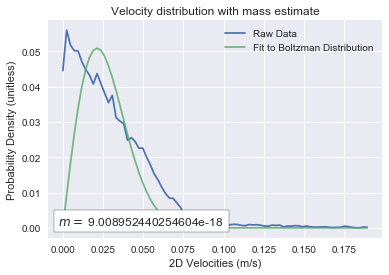

In [314]:
def boltz_dist(v, amp, m):
    T = 295 #room temp
    kb = 1.3806*10.**(-23.)
    return amp * ((m*v) / (kb*T)) * np.exp(-(m*v**2) / (2 * kb * T))

p0 = [max(density), 10**-12]
popt, pcov = curve_fit(boltz_dist, velocities, density, p0=p0)
y_fit = boltz_dist(velocities, *popt)
ax1 = plt.axes()
ax1.plot(velocities, density, label="Raw Data")
ax1.plot(velocities, y_fit, alpha=.8, label="Fit to Boltzman Distribution")
ax1.set_xlabel('2D Velocities (m/s)')
ax1.set_ylabel('Probability Density (unitless)')
ax1.legend()
ax1.set_title('Velocity distribution with mass estimate')
mass = popt[1]

text = AnchoredText(
    "$m = $ " + str(mass), 3);
ax1.add_artist(text);

<a id='q2'></a>
#### Diffusion Coefficients

After determining the mass, it is a simple matter to calculate the diffusion coefficient. In fact, for most of these measurements we don't even need the mass. As before, we are able to use sklearn's `LinearRegression` to subtract off the expected value of the distribution. Then we can do a bit of math to figure out the value for $\sigma$ and combine that with the same results from that one paper Brian posted. For more information about the theoretical background of this section, you may reference my previous lab report or the article from D2L.


[Back to Top](#top)

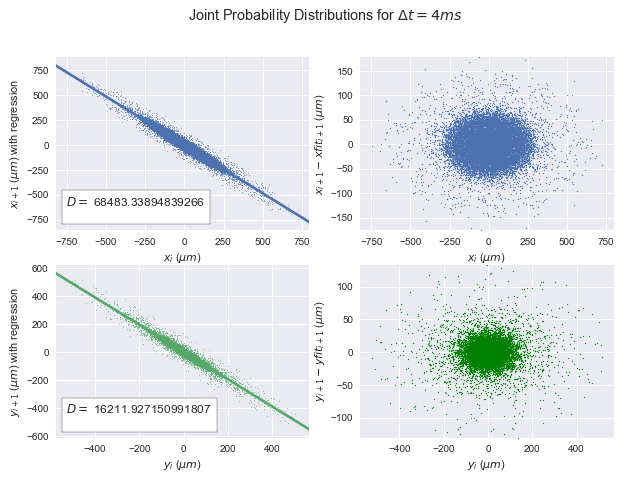

In [315]:
x_i = x[:-1]
x_i_n = x[1:]
y_i = y[:-1]
y_i_n = y[1:]

# build the model
model = LinearRegression(fit_intercept=True)
model.fit(x_i[:, np.newaxis], x_i_n)

# use it to predict the line values
xfit =  model.predict(x_i[:, np.newaxis])
yfit =  model.predict(y_i[:, np.newaxis])

# subtract off predictions from reality
xdif = x_i_n - xfit
ydif = y_i_n - yfit

# calculate the diffusion coefficients
dcoef_x = (pd.Series(xdif).apply(lambda x: x**2).sum() / len(xdif)) / (2 / framerate)
dcoef_y = (pd.Series(ydif).apply(lambda x: x**2).sum() / len(ydif)) / (2 / framerate)


# build the axes
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2,2, sharey=False)

# plot top left
sns.regplot(x_i, x_i_n, ax=ax1, scatter_kws={'s':1})
ax1.set_xlabel('$x_i$ ($\mu m$)')
ax1.set_ylabel('$x_{i+1}$ ($\mu m$) with regression')
ax1_text = AnchoredText(
    "$D = $ " + str(dcoef_x) + '\n', 3);
ax1.add_artist(ax1_text);

# top right
ax2.scatter(x_i, xdif, s=1);
ax2.set_ylim(min(xdif), max(xdif))
ax2.set_xlabel('$x_i$ ($\mu m$)')
ax2.set_ylabel('$x_{i+1} - xfit_{i+1}$ ($\mu m$)')

# bottom left
sns.regplot(y_i, y_i_n, ax=ax3, scatter_kws={'s':1})
ax3_text = AnchoredText(
    "$D = $ " + str(dcoef_y) + '\n', 3);
ax3.add_artist(ax3_text);
ax3.set_xlabel('$y_i$ ($\mu m$)')
ax3.set_ylabel('$y_{i+1}$ ($\mu m$) with regression')

# bottom right
ax4.scatter(y_i, y_i_n - yfit, s=1, c='g');
ax4.set_ylim(min(ydif), max(ydif))
ax4.set_xlabel('$y_i$ ($\mu m$)')
ax4.set_ylabel('$y_{i+1} - yfit_{i+1}$ ($\mu m$)')

fig.suptitle('Joint Probability Distributions for $\Delta t = 4 ms$')
fig.set_figwidth(10)
fig.set_figheight(7)

And, for the sake of completeness, here is an interactive version of the windowed joint probability distribution:

In [316]:
def plot_joint_dist(n):
    x_i = x[:-n]
    x_i_n = x[n:]
    y_i = y[:-n]
    y_i_n = y[n:]
    
    #build the axes
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(10)
    fig.set_figheight(4.5)
    
    sns.regplot(x_i_n, x_i, scatter_kws={"s":1}, ax=ax1)
    sns.regplot(y_i_n, y_i, scatter_kws={"s":1}, ax=ax2)
    
    ax1.set_title('joint probability for x')
    ax1.set_xlabel('x[i] displacement ($\mu$m)')
    ax1.set_ylabel('x[i + n] displacement ($\mu$m)')

    ax2.set_title('joint probability for y')
    ax2.set_xlabel('y[i] displacement ($\mu$m)')
    ax2.set_ylabel('y[i + n] displacement ($\mu$m)')
    
    
    
j = widgets.interactive(
    plot_joint_dist, 
    n=widgets.IntSlider(min=1, max=25, step=1, value=1)
)

display(j)
    

interactive(children=(IntSlider(value=1, description='n', max=25, min=1), Output()), _dom_classes=('widget-int…